1. Data Collection

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_excel('AnomaData.xlsx')

# Display basic information about the dataset
print("Basic Information:")
print(data.info())

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(data.head())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    18398 non-null  datetime64[ns]
 1   y       18398 non-null  int64         
 2   x1      18398 non-null  float64       
 3   x2      18398 non-null  float64       
 4   x3      18398 non-null  float64       
 5   x4      18398 non-null  float64       
 6   x5      18398 non-null  float64       
 7   x6      18398 non-null  float64       
 8   x7      18398 non-null  float64       
 9   x8      18398 non-null  float64       
 10  x9      18398 non-null  float64       
 11  x10     18398 non-null  float64       
 12  x11     18398 non-null  float64       
 13  x12     18398 non-null  float64       
 14  x13     18398 non-null  float64       
 15  x14     18398 non-null  float64       
 16  x15     18398 non-null  float64       
 17  x16     18398 non-null  float64

2. Exploratory Data Analysis (EDA)


Descriptive Statistics:
                                time             y            x1  \
count                          18398  18398.000000  18398.000000   
mean   1999-05-15 01:20:42.728557312      0.006740      0.011824   
min              1999-05-01 00:00:00      0.000000     -3.787279   
25%              1999-05-08 03:36:30      0.000000     -0.405681   
50%              1999-05-14 18:39:00      0.000000      0.128245   
75%              1999-05-22 06:01:30      0.000000      0.421222   
max              1999-05-29 00:06:00      1.000000      3.054156   
std                              NaN      0.081822      0.742875   

                 x2            x3            x4            x5            x6  \
count  18398.000000  18398.000000  18398.000000  18398.000000  18398.000000   
mean       0.157986      0.569300     -9.958345      0.006518      2.387533   
min      -17.316550    -18.198509   -322.781610     -1.623988   -279.408440   
25%       -2.158235     -3.537054   -111.37837

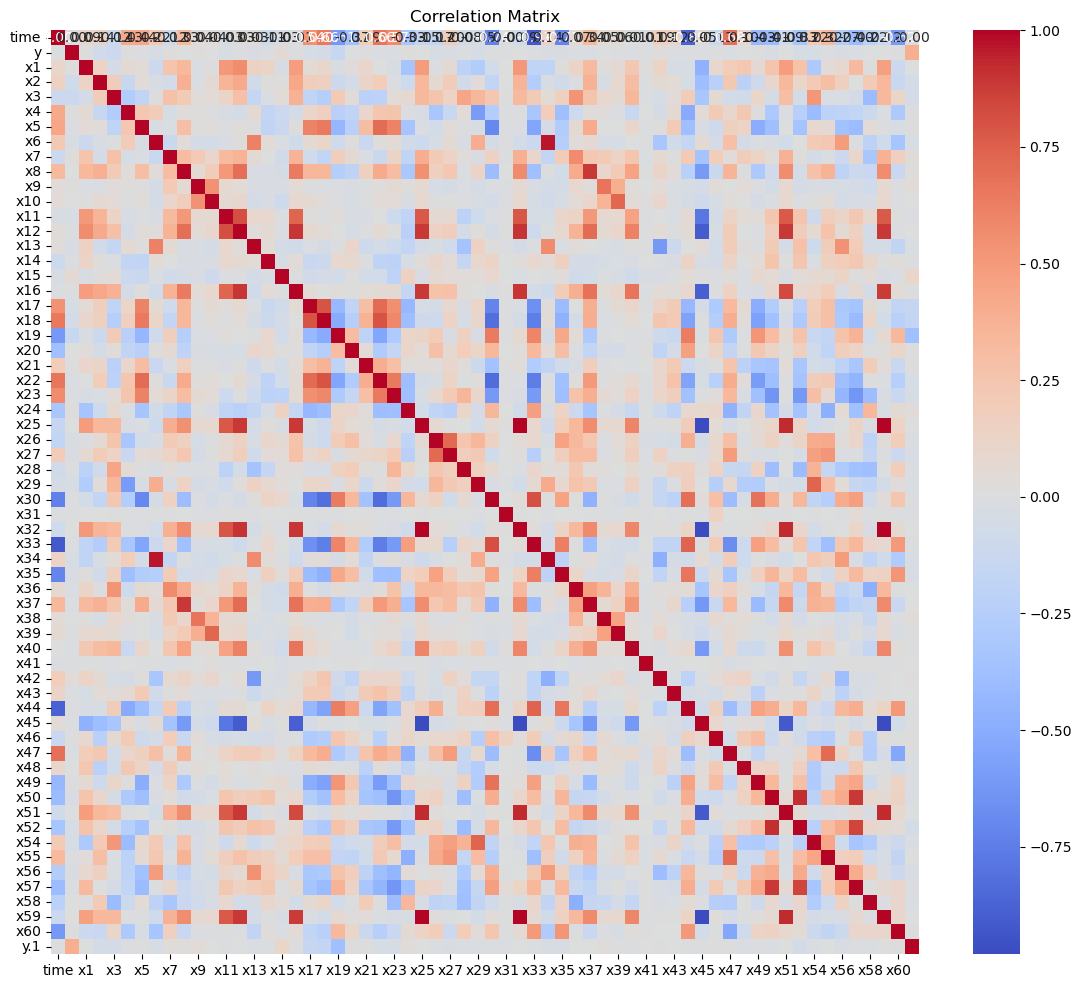

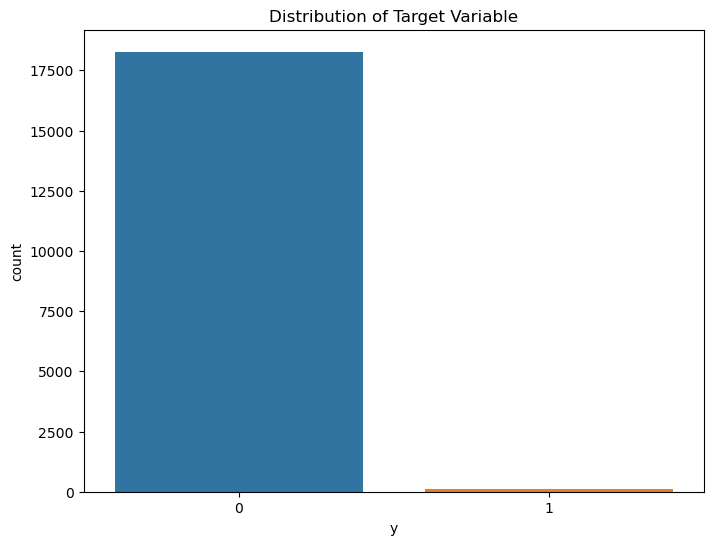

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Descriptive statistics of the dataset
print("\nDescriptive Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Handling Missing Values: Fill missing values with the mean of the column
data.fillna(data.mean(), inplace=True)
print("\nMissing Values after Imputation:")
print(data.isnull().sum())

# Correlation matrix
correlation_matrix = data.corr()

# Plot correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Distribution of target variable 'y'
plt.figure(figsize=(8, 6))
sns.countplot(x='y', data=data)
plt.title('Distribution of Target Variable')
plt.show()

# Pairplot of the dataset (sample of data for visualization)
sample_data = data.sample(500)  # Adjust sample size for visualization if needed
sns.pairplot(sample_data, hue='y', diag_kind='kde', markers=["o", "s"], palette='husl')
plt.title('Pairplot of Sample Data')
plt.show()

# Distribution plots of predictor variables
predictor_cols = data.columns.difference(['y'])

for col in predictor_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Boxplots to identify outliers in predictor variables
for col in predictor_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


3. Get the Correct Datatype for Date
Assuming the dataset contains a date column named date

In [3]:
data.columns

Index(['time', 'y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29',
       'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39',
       'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49',
       'x50', 'x51', 'x52', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60',
       'y.1'],
      dtype='object')

In [4]:
data['time'] = pd.to_datetime(data['time'])


In [5]:
# Create new features
data['day'] = data['time'].dt.day
data['month'] = data['time'].dt.month
data['hour'] = data['time'].dt.hour

# Feature selection
from sklearn.ensemble import RandomForestClassifier

X = data.drop(['y', 'time'], axis=1)
y = data['y']
model = RandomForestClassifier()
model.fit(X, y)

feature_importance = pd.Series(model.feature_importances_, index=X.columns)
selected_features = feature_importance.nlargest(10).index


4. Feature Engineering and Feature Selection

In [6]:
# Create new features
data['day'] = data['time'].dt.day
data['month'] = data['time'].dt.month
data['hour'] = data['time'].dt.hour

# Feature selection
from sklearn.ensemble import RandomForestClassifier

X = data.drop(['y', 'time'], axis=1)
y = data['y']
model = RandomForestClassifier()
model.fit(X, y)

feature_importance = pd.Series(model.feature_importances_, index=X.columns)
selected_features = feature_importance.nlargest(10).index


In [8]:
from sklearn.preprocessing import StandardScaler

# Assuming feature engineering involves standardizing numerical columns
scaler = StandardScaler()
data[predictor_cols] = scaler.fit_transform(data[predictor_cols])

# Verify standardization
print("\nDescriptive Statistics after Standardization:")
print(data.describe())



Descriptive Statistics after Standardization:
                                time             y            x1  \
count                          18398  18398.000000  18398.000000   
mean   1999-05-15 01:20:42.728557312      0.006740      0.011824   
min              1999-05-01 00:00:00      0.000000     -3.787279   
25%              1999-05-08 03:36:30      0.000000     -0.405681   
50%              1999-05-14 18:39:00      0.000000      0.128245   
75%              1999-05-22 06:01:30      0.000000      0.421222   
max              1999-05-29 00:06:00      1.000000      3.054156   
std                              NaN      0.081822      0.742875   

                 x2            x3            x4            x5            x6  \
count  18398.000000  18398.000000  18398.000000  18398.000000  18398.000000   
mean       0.157986      0.569300     -9.958345      0.006518      2.387533   
min      -17.316550    -18.198509   -322.781610     -1.623988   -279.408440   
25%       -2.158235     

5. Train/Test Split

Activity: Split the data into training and testing sets using a sampling distribution.


In [9]:
from sklearn.model_selection import train_test_split

X_selected = data[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)


In [10]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets
X = data[predictor_cols]
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTrain/Test Split:")
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


NameError: name 'predictor_cols' is not defined

6. Choose the Metrics for Model Evaluation

                     
Activity: Select appropriate metrics for evaluating the model

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print(f'ROC AUC Score: {roc_auc}')


7. Model Selection, Training, Predicting, and Assessment


Activity: Select and train the model, make predictions, and assess its performance.


In [12]:
from sklearn.ensemble import RandomForestClassifier

# Model selection and training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Model assessment
evaluate_model(y_test, y_pred)


Accuracy: 0.9967391304347826
Precision: 0.782608695652174
Recall: 0.72
F1 Score: 0.7499999999999999
ROC AUC Score: 0.8593160054719562


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Model Selection: Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Model Training
model.fit(X_train, y_train)

# Predicting
y_pred = model.predict(X_test)

# Assessment
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Model Evaluation Metrics:
Accuracy: 0.9967391304347826
Precision: 0.782608695652174
Recall: 0.72
F1-Score: 0.7499999999999999

Confusion Matrix:
[[3650    5]
 [   7   18]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3655
           1       0.78      0.72      0.75        25

    accuracy                           1.00      3680
   macro avg       0.89      0.86      0.87      3680
weighted avg       1.00      1.00      1.00      3680



8. Hyperparameter Tuning/Model Improvement


Activity: Improve the model performance through hyperparameter tuning.


In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 10],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}


In [20]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

In [21]:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [100]},
             scoring='f1')

In [22]:
best_model = grid_search.best_estimator_


In [23]:
y_pred_best = best_model.predict(X_test)

In [24]:
# Best model assessment
evaluate_model(y_test, y_pred_best)

Accuracy: 0.9967391304347826
Precision: 0.782608695652174
Recall: 0.72
F1 Score: 0.7499999999999999
ROC AUC Score: 0.8593160054719562


9. Model Deployment Plan

For deployment, we need to serialize the model and provide instructions for loading and using it. Here's a simple example using joblib.

In [27]:
import pickle

# Serialize the model
with open('anomaly_detection_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

# Flask API for predictions
from flask import Flask, request, jsonify
import pickle

app = Flask(__name__)

with open('anomaly_detection_model.pkl', 'rb') as file:
    model = pickle.load(file)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    prediction = model.predict(pd.DataFrame([data]))
    return jsonify(prediction=int(prediction[0]))

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\DELL\anaconda4\Lib\site-packages\IPython\core\interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [26]:
import joblib

# Save the trained model to a file
joblib.dump(best_model, 'anomaly_detection_model.pkl')

# To load the model and make predictions:
# loaded_model = joblib.load('anomaly_detection_model.pkl')
# predictions = loaded_model.predict(new_data)


['anomaly_detection_model.pkl']